# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
from collections import deque
import numpy as np
import torch
import matplotlib.pyplot as plt

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="./Banana_Windows_x86_64/Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

### 3. Train the Agent
The Agent class is imported at the top of this notebook. This agent is of the kind: Deep Q Learning with Experience Replay. In this notebook, we access two methods of this class: act and step. act calculates the q values of the local q network and takes an action according to the epsilon-greedy algorithm. step saves the experience in the experience buffer and decides, whether the target q network should be updated based.

The dqn function runs the whole training process

In [4]:
from dqn_agent import Agent

agent = Agent(state_size=37, action_size=4, seed=0)

def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    scores = []
    scores_window = deque(maxlen=100)
    eps = eps_start
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(int(action))[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break
        scores_window.append(score)
        scores.append(score)
        eps = max(eps_end, eps_decay*eps)
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
    print('\nFinished Training in {:d} episodes!\tAverage Score: {:.2f}'.format(n_episodes, np.mean(scores_window)))
    torch.save(agent.qnetwork_local.state_dict(), 'checkpoint2000.pth')
    return scores



Run the function dqn and save the assign the scores to the scores variable.

In [5]:
scores = dqn()
scores

Episode 100	Average Score: 0.83
Episode 200	Average Score: 3.78
Episode 300	Average Score: 7.48
Episode 400	Average Score: 10.39
Episode 500	Average Score: 13.32
Episode 600	Average Score: 14.11
Episode 700	Average Score: 15.17
Episode 800	Average Score: 15.42
Episode 900	Average Score: 16.39
Episode 1000	Average Score: 16.59
Episode 1100	Average Score: 16.72
Episode 1200	Average Score: 16.94
Episode 1300	Average Score: 16.78
Episode 1400	Average Score: 15.60
Episode 1500	Average Score: 15.92
Episode 1600	Average Score: 16.38
Episode 1700	Average Score: 17.00
Episode 1800	Average Score: 15.61
Episode 1900	Average Score: 15.43
Episode 2000	Average Score: 15.59

Finished Training in 2000 episodes!	Average Score: 15.59


[0.0,
 2.0,
 0.0,
 0.0,
 -1.0,
 1.0,
 0.0,
 -1.0,
 -1.0,
 0.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 -1.0,
 0.0,
 -1.0,
 0.0,
 1.0,
 0.0,
 -1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 1.0,
 0.0,
 1.0,
 -1.0,
 1.0,
 2.0,
 2.0,
 -2.0,
 3.0,
 1.0,
 1.0,
 3.0,
 1.0,
 -1.0,
 2.0,
 -4.0,
 2.0,
 1.0,
 0.0,
 0.0,
 2.0,
 3.0,
 2.0,
 2.0,
 0.0,
 1.0,
 0.0,
 -1.0,
 0.0,
 2.0,
 2.0,
 1.0,
 1.0,
 3.0,
 0.0,
 0.0,
 0.0,
 3.0,
 2.0,
 1.0,
 0.0,
 0.0,
 4.0,
 1.0,
 3.0,
 3.0,
 2.0,
 0.0,
 0.0,
 0.0,
 4.0,
 2.0,
 2.0,
 1.0,
 0.0,
 5.0,
 2.0,
 2.0,
 0.0,
 1.0,
 1.0,
 2.0,
 1.0,
 2.0,
 3.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 3.0,
 5.0,
 2.0,
 2.0,
 1.0,
 -1.0,
 2.0,
 0.0,
 2.0,
 3.0,
 1.0,
 1.0,
 1.0,
 0.0,
 2.0,
 4.0,
 2.0,
 3.0,
 7.0,
 10.0,
 3.0,
 3.0,
 1.0,
 1.0,
 5.0,
 2.0,
 6.0,
 1.0,
 0.0,
 0.0,
 2.0,
 1.0,
 2.0,
 5.0,
 3.0,
 6.0,
 3.0,
 2.0,
 -2.0,
 0.0,
 3.0,
 4.0,
 8.0,
 4.0,
 4.0,
 3.0,
 3.0,
 5.0,
 2.0,
 5.0,
 2.0,
 5.0,
 4.0,
 0.0,
 4.0,
 2.0,
 0.0,
 6.0,
 4.0,
 8.0,
 6.0,
 11

### 4. Validate the functionality
When you run this code block, a demonstration will be shown. Chose between checkpoint10.pth, checkpoint100.pth and chackpoint1000.pth representing the number of episodes, the model was trained with.

In [10]:
agent = Agent(state_size=37, action_size=4, seed=0)
agent.qnetwork_local.load_state_dict(torch.load('checkpoint2000.pth'))

env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = agent.act(state, 0)        # select an action
    env_info = env.step(int(action))[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 12.0


In [11]:
env.close()

### 5. Show Model Performance

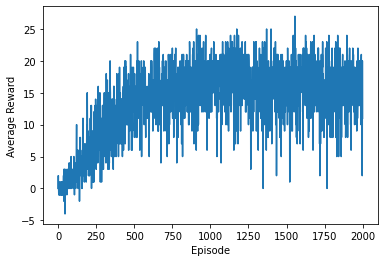

In [9]:
plt.plot(scores)
plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.show()

In [21]:
scores

[]